![](images/baner.png)

## Training the first ML model

We got the introduction.
Now we should dp the hands-on experiments!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

We will work with an interesting dataset on [Life Expectancy from WHO](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).
Our task will be to predict the `Life expectancy` based on other columns.

In [2]:
df = pd.read_csv("../data/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

We have some `NA` in `Life expectancy`, we must drop them since it doesn't make sense to create model without a target.

In [4]:
df = df.loc[~df['Life expectancy'].isna(), :]

We see some `NA`, some and `Country` and `Status` columns are strings.
Let's drop all of them for now and divide data into `X` and `y`.
Then, divide into train and test.

In [5]:
from sklearn.model_selection import train_test_split
df2 = df.dropna().drop(columns=["Country", "Status"])

X = df2.drop(columns=['Life expectancy'])
y = df2['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

And train the linear regression model!

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We have model trained, now it's time to assess it's performance!

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(X_test)

print("Model on all variables without NA")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Model MAE: {mean_absolute_error(y_test, y_pred)}")

Model on all variables without NA
Model MSE: 13.516706224527082
Model RMSE: 3.6765073404696316
Model MAE: 2.7898832159755824


Is it good, is it bad?
Good question, we could compare with model build only on one variable. `Adult Mortality` seems like a reasonable choice.

In [9]:
X = df2[['Adult Mortality']]  # since X is supposed to be a dataframe/matrix, we must index it this way
y = df2['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model on Adult Mortality variable")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Model MAD: {mean_absolute_error(y_test, y_pred)}")

Model on Adult Mortality variable
Model MSE: 37.877043036044356
Model RMSE: 6.154432795639607
Model MAD: 4.480029140229395


Ok, so the model is a bit worse.


### Improving the model by filing NA values

Not so fast, we cannot use the `fillna` method!
Why?

We will **leak the information** from test set to training set.
We should find the mean value on training set and then use it on test set. 

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
df3 = df.drop(columns=["Country", "Status"])
X = df3.drop(columns=['Life expectancy'])
y = df3['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

And train the model:

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model on one variable")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Model MAD: {mean_absolute_error(y_test, y_pred)}")

Model on one variable
Model MSE: 16.530838394594234
Model RMSE: 4.0658133742947715
Model MAD: 2.9909115543265457


One could say it wasn't helpful.
But now we are able to handle data with missing values!
Maybe production data will also contain some `NA`s from time to time?
Then working on data with dropped `NA` not be reasonable at all!

Now we can check the impact of changing the `Status` feature into one-hot.

In [14]:
df['Status'].value_counts()

Developing    2416
Developed      512
Name: Status, dtype: int64

In [15]:
df4 = df.drop(columns="Country").dropna()
df4 = pd.concat(
    [
        pd.get_dummies(df4['Status']),
        df4.drop(columns="Status")
    ], axis=1
)
X = df4.drop(columns=['Life expectancy'])
y = df4['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model on one variable")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Model MAD: {mean_absolute_error(y_test, y_pred)}")

Model on one variable
Model MSE: 13.452498779043589
Model RMSE: 3.667764820574458
Model MAD: 2.7930094149645863


It's hard to say whether we improved the model or is it just a fluctuation.

## How does linear regression work?

First let's explore a 2D case.

<AxesSubplot:xlabel='Adult Mortality', ylabel='Life expectancy'>

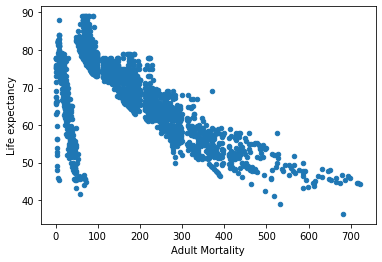

In [17]:
df.plot(x='Adult Mortality', y='Life expectancy', kind='scatter')

We can hold on with linear regression for a second since we immediately see something interesting!
There are at least two _paths_.

In [18]:
px.scatter(df, x='Adult Mortality', y='Life expectancy', color='Country')

If we play a bit with this data it seems like Adult mortality is sometimes wrongly reported as divided by 10 or 100...

We will not focus on data correctness not, and instead we will analyze a linear regression model.

### Anscombe's quartet

The famous example that shows why it's hard to asses datasets solely on numbers is the Anscombe's quartet:



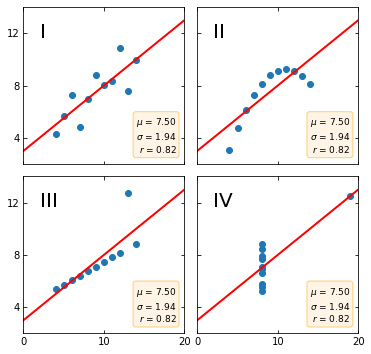

In [44]:
#| code-fold: true
# Source: https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

Those 4 datasets have the same mean, variance, correlation even though they are clearly different.

Now let's come back to the linear regression.

### Linear regression

This is a fundamental model for machine learning.

![](images/regression.png)


For example given those 4 red points we are looking for the best fit of the line.
Linear regression will minimize the _least squares_ error:

$$
(ax_1 + b - y_1)^2 + (ax_2 + b - y_2)^2 + (ax_3 + b - y_3)^2 + (ax_4 + b - y_4)^2 
$$

It is the sum of squares of distance between the predicted value $(ax_i + b)$ and the known $y_i$. 
We can also write it like:

$$
C(a,b;x) = \sum_{i=1}^N (a x_i + b - y_i)^2
$$

We can change $a$ and $b$ to generate different lines.
Linear regression algorithm finds $a$ and $b$ is the optimal in terms of $C$, i.e., it minimizes this sum.
There is no better $a$ and $b$ in terms of cost $C$ then those found by the linear regression (it doesn't mean that this model is the best in general).

In [19]:
x = np.array([1, 2, 3, 4]).reshape((-1, 1))
y = np.array([6, 5, 7, 10])
reg = LinearRegression()
reg.fit(x, y)
reg.coef_, reg.intercept_

(array([1.4]), 3.5000000000000013)

We see that the model fitted to the above points is:

$$
y = 1.4 x + 3.5
$$

We can easily say for example that value for $0$ is $3.5$, and value for $10$ is $17.5$.
Increasing $x$ by $1$, increases $y$ by $1.4$.
It's very useful that linear regression is such easy in interpretation.

Now let's fit and analyze model for life expectancy using sklearn one more time.
We will stick to using only one column for a while.

In [20]:
X_mortality = df[['Adult Mortality']]
y_expectancy = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X_mortality, y_expectancy, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model on one variable")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)}")
print(f"Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Model MAD: {mean_absolute_error(y_test, y_pred)}")

Model on one variable
Model MSE: 47.196378315450985
Model RMSE: 6.869962031587291
Model MAD: 4.764597082341191


The model is obviously worse, but let's look at it's parameters.

In [21]:
model.intercept_, model.coef_

(78.20257100829083, array([-0.05402412]))

This means that the fitted relationship can be described by equation:

$$
y = -0.054 x + 78.203
$$

In [22]:
import matplotlib.pyplot as plt

In [23]:
def fitted_function(x):
    return model.coef_ * x + model.intercept_

x1 = 0
x2 = 700
y1 = fitted_function(x1)
y2 = fitted_function(x2)

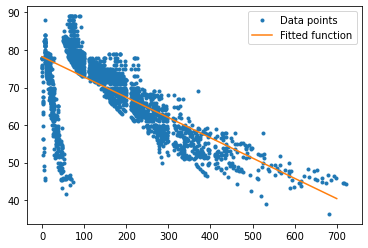

In [24]:
plt.plot(X_mortality, y_expectancy, '.', label="Data points")
plt.plot([x1, x2], [y1, y2], label="Fitted function")
plt.legend()

Well, it works!

Now we can see that we've done exactly what `model.predict()` suppose to do.
We can check if that's true.

In [25]:
y1, y2

(array([78.20257101]), array([40.38568536]))

In [26]:
model.predict(np.array([x1, x2]).reshape(-1, 1))

/home/piotr/anaconda3/envs/daftacademy-ds/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([78.20257101, 40.38568536])

Finally let's come back to the model on all features and analyze it's coefficients.

In [27]:
df2 = df.dropna().drop(columns=["Country", "Status"])

X = df2.drop(columns=['Life expectancy'])
y = df2['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

We can collect all coefficients in a single table:

In [28]:
s = pd.Series(model.coef_, X.columns)
s['Intercept'] = model.intercept_
s

Year                              -1.099243e-01
Adult Mortality                   -1.649304e-02
infant deaths                      9.230016e-02
Alcohol                           -1.366391e-01
percentage expenditure             4.265777e-04
Hepatitis B                       -5.419741e-03
Measles                           -1.302753e-05
BMI                                2.252844e-02
under-five deaths                 -6.888427e-02
Polio                              5.871620e-03
Total expenditure                  1.220344e-01
Diphtheria                         1.511306e-02
HIV/AIDS                          -4.370409e-01
GDP                               -1.144866e-06
Population                        -1.484163e-10
thinness  1-19 years              -3.625005e-02
thinness 5-9 years                -5.842498e-02
Income composition of resources    9.268621e+00
Schooling                          1.046039e+00
Intercept                          2.730100e+02
dtype: float64

Multidimensional example is much harder to imagine than 2D but think about this way:

$$
y = x_{Year} \cdot c_{Year} + x_{Adult Mortality} \cdot c_{Adult Mortality} + ... + x_{Schooling} \cdot y_{Schooling} + intercept
$$

Now everything should make sense.
We can experiment a bit with the model, let's dig out the 2014 data on Poland.

In [29]:
x_p = df.query("Country == 'Poland' and Year == 2014").reset_index(drop=True)
x_p

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Poland,2014,Developed,77.3,12.0,2,10.71,243.808475,96.0,0,...,94.0,6.35,98.0,0.1,14341.675,3811735.0,1.9,2.1,0.85,16.4


And ask for prediction.

In [30]:
y_p1 = model.predict(x_p.drop(columns=['Country', 'Life expectancy', 'Status']))
y_p1

array([78.55722584])

Ok, so the model predicted life expectancy of 78.56 years.
What would happen to models prediction if we magically percentage of people infected by HIV/AIDS by 5 percentage points.

In [31]:
x_p2 = x_p.copy()
x_p2.loc[0, 'HIV/AIDS'] += 5

In [32]:
y_p2 = model.predict(x_p2.drop(columns=['Country', 'Life expectancy', 'Status']))
y_p2

array([76.37202153])

Well, it dropped by over 2 years.

In [33]:
y_p2 - y_p1

array([-2.18520431])

Since we know it's a linear regression model we didn't have to make this prediction.
Coefficients are all we need!

In [34]:
5 * (s['HIV/AIDS'])

-2.185204309630258

In [35]:
y_p1 + 5 * (s['HIV/AIDS'])

array([76.37202153])

## Other machine learning algorithms

The `scikit-learn` library is full of ML models that can be explored in [the documentation](https://scikit-learn.org/stable/).
Bellow I show some other methods that could be use to model the Life expectancy.

In [53]:
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor

In [55]:

model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = NuSVR()
model2.fit(X_train, y_train)

model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

print("Model on one variable")
print(f"Model1 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}")
print(f"Model2 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2))}")
print(f"Model3 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred3))}")


Model on one variable
Model1 RMSE: 3.6765073404696316
Model2 RMSE: 8.600016260194172
Model3 RMSE: 2.62610751454812


As we can see, some models might perform much better on much worse then the linear regression **in case of this problem**.